In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os, time,json
import matplotlib.pyplot as plt

from scipy import stats
import scipy
scipy.__version__

FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['insurance - insurance.csv']

Questions 

    Q1. Do smokers have higher insurance charges than non-smokers?
    Q2. Are men more likely to smoke than women?
    Q3. Do different regions have different charges, on average?
    
    

#### Null Hypothesis:
Smokers and non-smokers alike do not have significant insurance charges. Both women and men are average smokers. Different regions do have different charges.

#### Alternate Hypothesis:
Smokers do have higher insurance charges than non-smokers. Women are more likely to smoke than men. Different regions do not have differnt charges on average. 

#### Significance Level(Alpha):


In [13]:
# load dataframe 
filename = ('Data/insurance - insurance.csv')
df = pd.read_csv(filename)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
# check the statistics of the data 
df.describe().round()

,age,bmi,children,charges
count,1336.0,1336.0,1336.0,1336.0
mean,39.0,31.0,1.0,13288.0
std,14.0,6.0,1.0,12111.0
min,18.0,16.0,0.0,1122.0
25%,27.0,26.0,0.0,4747.0
50%,39.0,30.0,1.0,9389.0
75%,51.0,35.0,2.0,16687.0
max,64.0,53.0,5.0,63770.0


In [17]:
# check for duplicates 
df.duplicated().sum()

1

In [23]:
# drop duplicates 
df.drop_duplicates(keep=False, inplace=True)

In [24]:
# checking for drop duplicates 
df.duplicated().sum()

0

### Q1 -  Do smokers have higher insurance charges than non-smokers?


In [32]:
df['smoker'].value_counts()

no     1062
yes     274
Name: smoker, dtype: int64

In [33]:
df['charges'].value_counts()

16884.92400    1
2117.33885     1
2221.56445     1
19798.05455    1
13063.88300    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1336, dtype: int64

In [41]:
# separated non smokers
df['smoker_no']=df['smoker'].str.contains('no')
df['smoker_no'].value_counts(normalize=True)

True     0.79491
False    0.20509
Name: smoker_no, dtype: float64

In [38]:
# saving list of columns for each group 
insured_cols = ['smoker_no', 'charges']

In [42]:
# non smokers in separate variable 
yes_smoke = df.loc[df['smoker_no']==False, insured_cols]
yes_smoke

,smoker_no,charges
0,False,16884.92400
11,False,27808.72510
14,False,39611.75770
19,False,36837.46700
23,False,37701.87680
...,...,...
1313,False,36397.57600
1314,False,18765.87545
1321,False,28101.33305
1323,False,43896.37630


In [43]:
# non smokers in separate variable 
not_smoker = df.loc[df['smoker_no']==True, insured_cols]
not_smoker

,smoker_no,charges
1,True,1725.55230
2,True,4449.46200
3,True,21984.47061
4,True,3866.85520
5,True,3756.62160
...,...,...
1332,True,11411.68500
1333,True,10600.54830
1334,True,2205.98080
1335,True,1629.83350


In [45]:
## visualizing both groups
plot_df = pd.concat([yes_smoke,not_smoker])
plot_df

,smoker_no,charges
0,False,16884.9240
11,False,27808.7251
14,False,39611.7577
19,False,36837.4670
23,False,37701.8768
...,...,...
1332,True,11411.6850
1333,True,10600.5483
1334,True,2205.9808
1335,True,1629.8335


<AxesSubplot:xlabel='smoker_no', ylabel='charges'>

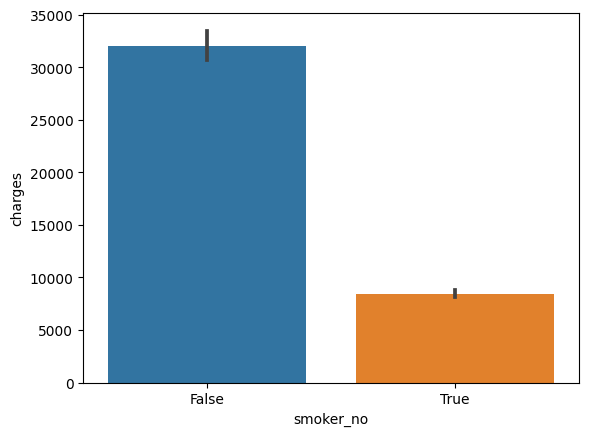

In [72]:
# Visual
sns.barplot(data=plot_df, x='smoker_no', y='charges')

Non-smokers insurance charges are significantly higher than those who smoke. 

### Testing Assumptions

In [49]:
ntsmker_group = not_smoker['charges']
smker_group = yes_smoke['charges']
ntsmker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1062, dtype: float64

In [50]:
# checking smoker group for outliers
smoker_outliers = np.abs(stats.zscore(smker_group)) > 3

## how many outliers?
smoker_outliers.sum()

0

In [51]:
len(smker_group)

274

In [55]:
# checking the non smoker groups for outliers 
ntsmoker_outliers = np.abs(stats.zscore(ntsmker_group)) > 3

# how many outliers
ntsmoker_outliers.sum()

24

In [56]:
# removing outliers from non smoker group 
non_smoker_clean = ntsmker_group[ntsmoker_outliers==False]
non_smoker_clean

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1038, dtype: float64

### Test for Normality 

In [59]:
# Check smoker group for normality
stats.normaltest(smker_group)

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [58]:
len(smker_group)

274

In [60]:
# Check non smoker group for normality
stats.normaltest(non_smoker_clean)

NormaltestResult(statistic=163.61477476065267, pvalue=2.961440980038499e-36)

In [61]:
len(non_smoker_clean)

1038

In [62]:
# Testing for equal variances 
## Use Levene's test for equal variance 
result = stats.levene(smker_group, non_smoker_clean)
result

LeveneResult(statistic=520.7967321643627, pvalue=2.504916336671298e-97)

In [63]:
## Use an if-else to help interpret the p-value
result.pvalue < .05

True

####  Final Hypothesis test 

In [64]:
final_rst= stats.ttest_ind(smker_group, non_smoker_clean, equal_var=False)
final_rst

Ttest_indResult(statistic=33.71461284097539, pvalue=2.8907227189751836e-104)

In [65]:
final_rst.pvalue <.00000001

True

In [68]:
# calculate the group means
smker_group.mean().round(2)

32050.23

In [69]:
non_smoker_clean.mean().round(2)

7952.0

Final Conclusion 

The null hypothesis and the alternative hypothesis is rejected. Non-smokers 